# Sect 45&46: Multi-Layered Perceptrons & How to Tune Them

- Study Group: 02-11-20
- online-ds-ft-100719

## Announcements/Choices

- **When/if to cover PySpark sections (sect 40 & 41)?**
    - Capstone starts next week.
    - Two Sections require PySpark/Docker.
        - (Honestly it just does enough to check the box of having covered it, but that's it.)
- **One alternative option: give you the Deep Learning Project from curric v1.1** and talk through how to tackle it
- **Section 50: Amazon Web Services**
    - Let's save it for a couple weeks into capstone and use it in order to set up storage for web-dashboards deployed with dash/plotly and herokuapp.

## Learning Objectives

- **Revisit neural networks powerpoint with updated images to review biological inspiration of ANNs**
- **Discuss details about deep neural networks:**
    - what makes an ANN "deep"?
    - what are the different activation functions?
    - how do we do hyperparameter tuning/grid-searching?
- **Discuss/demo using Keras neural network for image classification**

# Section 45 - Multi-Layered Perceptrons

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-image-classification-with-mlps-online-ds-ft-100719/master/images/Deeper_network.jpg">

## Basics of Building a Neural Network with Keras:


**Basics of Building a Neural Network with Keras:**
1. **Import required modules**
    - **For general neural network**
        - `from keras import models, layers,optimizers`
    - **For text:**
        - `from keras.preprocessing.text import Tokenizer`
        - `from keras.utils.np_utils import to_categorical`
    - **For images:**
        - `from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img`
    - **For relocating image files:**
        - `import os, shutil`

2. **Decide on a network architecture (have only discussed sequential thus far)**
    - `model = models.Sequential()`

3. **Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.**
    - `model.add(layers.Dense(units, activation='relu', input_shape))`
    - `model.add(layers.Dense(units, activation='relu',input_shape))`
    - **3B. Final layer choice:**
        - Want to have as many neurons as classes you are trying to predict
        -  Final activation function:
            - For binary classificaiton, use `activation='sigmoid'`
            - For multi classificaiton, use `activation='softmax'`
            

4. **Compile the model:**
    - Specify optimiziers
        - `RMSprop`, `SGD`
    - specify loss functions
        - for binary classification: `'binary_crossentropy'`
        - for multi classification: `'categorical_crossentropy'`
    - specify metrics
        -usually 'acc'
    
    

5. **Training the model**
    - `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`
        - Note: if using images with ImageDataGenerator, use `model.fit_generator()`
    
    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ideally have as large of a batch as your hardware can handle without going out of memory.
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).
        

6. **Evaluation / Predictions**
    - To get predicted results:
        - `y_hat_test = model.predict(test)`
    - To get evaluation metrics:
        - `results_test = model.evaluate(test, label_test)`
        

<img src="../images/neural_network_steps.png">

7. **Visualization**
    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']` 
            
```python 
# Plot loss
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
acc_values = history_dict['acc'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

```

    

### Reference Links

-[Keras Lab Solution with text-preprocessing](https://github.com/learn-co-curriculum/dsc-04-41-05-keras-lab/tree/solution)

#### Additional Keras - Getting Started Links:
* https://keras.io/getting-started/
* https://keras.io/getting-started/sequential-model-guide/#compilation
* https://www.coursera.org/learn/deep-neural-network/lecture/BhJlm/rmsprop
* https://www.coursera.org/learn/deep-neural-network/lecture/qcogH/mini-batch-gradient-descent
* A full book on Keras by the author of Keras himself:  
    https://www.manning.com/books/deep-learning-with-python

## Activation Functions
- https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x, derivative=False):
    f = 1 / (1 + np.exp(-x))
    if (derivative == True):
        return f * (1 - f)
    return f

def tanh(x, derivative=False):
    f = np.tanh(x)
    if (derivative == True):
        return (1 - (f ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = 0
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = 0
    return f

def leaky_relu(x, leakage = 0.05, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = leakage
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = x[i]* leakage
    return f

def arctan(x, derivative=False):
    if (derivative == True):
        return 1/(1+np.square(x))
    return np.arctan(x)



def plot_activation(fn):
    z = np.arange(-10, 10, 0.2)
    y = fn(z)
    dy = fn(z, derivative=True)
    fig,ax=plt.subplots(figsize=(6,4))
    ax.set_title(f'{fn.__name__}')
    ax.set(xlabel='Input',ylabel='Output')
    ax.axhline(color='gray', linewidth=1,)
    ax.axvline(color='gray', linewidth=1,)
    ax.plot(z, y, 'r', label='original (y)')
    ax.plot(z, dy, 'b', label='derivative (dy)')
    ax.legend();
    plt.show()
# plot_activation(sigmoid)

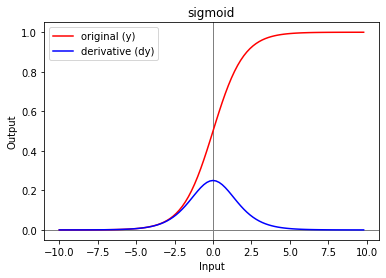

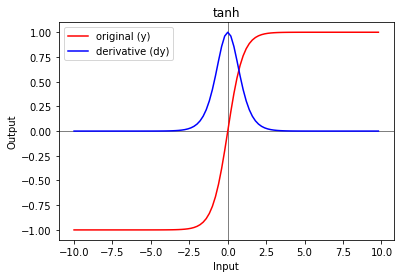

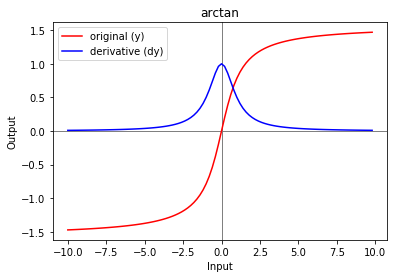

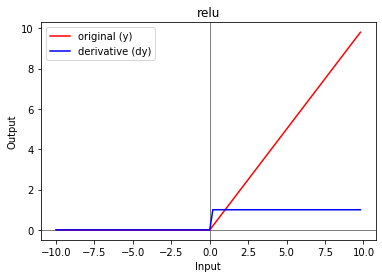

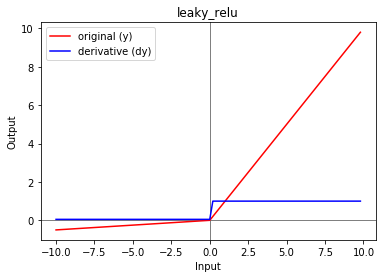

[None, None, None, None, None]

In [2]:
act_funcs = [sigmoid,tanh,arctan,relu,leaky_relu]
[plot_activation(fn) for fn in act_funcs]

## Image Classification with MLPs


### Tools & Applications introduced
- **Numpy Functions**
    - To unrow a 3-D image ( row, cols, RGB):
        - `image_array.shape # returns (790, 64,64,3) - 790 imgs, size = 64,64, RGB=3
        - `img_unrow = img.reshape(len(image_array), -1).T`
            - -1 takes care of the remaining dims
    - To increase the 'rank' of a vector (the first dimension) 
        - `np.reshape(vector, (1,len(image_array))`
- **Keras**
    - `from keras import models, layers, optimizers`
    - `keras.preprocessing.image` 
    - `keras.preprocessing.text`
- `from matplotlib.pyplot import imread, imshow`

In [3]:
from fsds_100719.imports import *

import keras
from keras.datasets import mnist

from keras import models, layers,optimizers
from keras.models import Sequential
from keras.layers import Dense,Dropout

from keras.utils import to_categorical

fsds_1007219  v0.7.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train.shape:\t{X_train.shape}')
print(f'X_test.shape:\t{X_test.shape}')
print()

X_train.shape:	(60000, 28, 28)
X_test.shape:	(10000, 28, 28)



[Text(0.5, 1.0, 'Image #46390: Label: 6')]

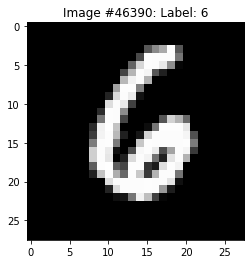

In [4]:
## Visualize random image
i = np.random.choice(list(range(len(X_train))))

sample_image = X_train[i]
sample_label = y_train[i]

title=f'Image #{i}: Label: {sample_label}'

plt.imshow(sample_image,cmap='gray')
ax=plt.gca()
ax.set(title=title)

In [6]:
## Print out image shapes and data shapes
print(sample_image.shape)
print(f'X_train.shape:\t{X_train.shape}')
print(f'X_test.shape:\t{X_test.shape}')
print(28*28)

X_train.shape:	(60000, 28, 28)
X_test.shape:	(10000, 28, 28)
784


> ***We can interpret these numbers as saying "X_train consists of 60,000 images that are 28x28". We'll need to reshape them from (28, 28), a 28x28 matrix, to (784,), a 784-element vector. However, we need to make sure that the first number in our reshape call for both X_train and X_test still correspond to the number of observations we have in each.***

In [7]:
shapes = list(sample_image.shape)
shapes

[28, 28]

In [8]:
X_shapes = dict(X_train=X_train.shape,
               X_test=X_test.shape,
               y_train=y_train.shape,
                y_test=y_test.shape,
               image=sample_image.shape,
               image_unrow = sample_image.shape[0]*sample_image.shape[1],)

print(X_shapes['X_train'])
print(X_shapes['image_unrow'])

(60000, 28, 28)
784


In [9]:
#  reshape and convert astype('float32') so that we convert our data from type uint8 to float32
X_train = X_train.reshape(X_shapes['X_train'][0],X_shapes['image_unrow']).astype('float32')
X_test = X_test.reshape(X_shapes['X_test'][0],X_shapes['image_unrow']).astype('float32')

X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [10]:
## normalizing data 
X_train /=255.
X_test /= 255.

### Preparing Targets

- This is a **Multiclass Classification** problem.
    - we need to One-Hot Encode our labels
    - `keras.utils.to_categorical`

In [11]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
X_shapes['image_unrow']

784

In [13]:
model = Sequential()

model.add(
    Dense(64, activation='tanh',
            input_shape=( X_shapes['image_unrow'],) 
         ))


model.add(
    Dense(10, activation='softmax',
            input_shape=( X_shapes['image_unrow'],) 
         ))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
## compile model
compile_kws = dict(loss = 'categorical_crossentropy',
                   optimizer='sgd', 
                   metrics=['accuracy'])
model.compile(**compile_kws)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
## Train network
fit_kws=dict(epochs=5, batch_size=64, validation_data=(X_test,y_test))
results = model.fit(X_train,y_train,**fit_kws)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.8777 - accuracy: 0.7869 - val_loss: 0.5094 - val_accuracy: 0.8746
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.4631 - accuracy: 0.8781 - val_loss: 0.3971 - val_accuracy: 0.8962
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3897 - accuracy: 0.8933 - val_loss: 0.3526 - val_accuracy: 0.9049
Epoch 4/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3531 - accuracy: 0.9015 - val_loss: 0.3256 - val_accuracy: 0.9102
Epoch 5/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3292 - accuracy: 0.9074 - val_loss: 0.3064 - val_accuracy: 0.9140


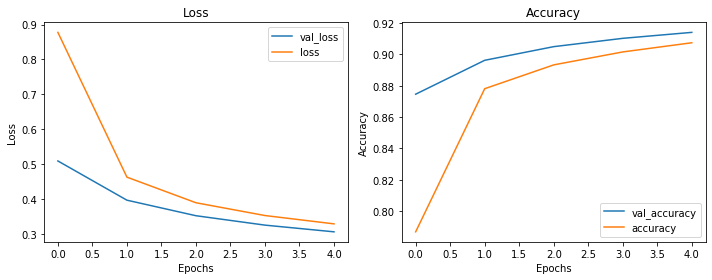

In [16]:
def visualize_training_results(results,figsize=(10,4),subplot_kws={}):
    history = results.history
    fig,axes=plt.subplots(ncols=2,figsize=figsize,**subplot_kws)
    
    ax=axes[0]
    ax.plot(history['val_loss'])
    ax.plot(history['loss'])
    ax.legend(['val_loss', 'loss'])
    ax.set(title='Loss', xlabel='Epochs', ylabel='Loss')
#     plt.show()
    
    ax=axes[1]
    ax.plot(history['val_accuracy'])
    ax.plot(history['accuracy'])
    ax.legend(['val_accuracy', 'accuracy'])
    ax.set( title='Accuracy',xlabel='Epochs', ylabel='Accuracy')
    plt.tight_layout()
#     return fig
visualize_training_results(results)

In [17]:
## Try a bigger model

model_2 = Sequential()
model_2.add(Dense(64, activation='tanh',input_shape=( X_shapes['image_unrow'],)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(10, activation='softmax'))


In [18]:
compile_kws=dict(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_2.compile(**compile_kws)
model_2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.8835 - accuracy: 0.7904 - val_loss: 0.5006 - val_accuracy: 0.8826
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.4429 - accuracy: 0.8879 - val_loss: 0.3739 - val_accuracy: 0.9017
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3607 - accuracy: 0.9036 - val_loss: 0.3242 - val_accuracy: 0.9109
Epoch 4/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.3201 - accuracy: 0.9118 - val_loss: 0.2953 - val_accuracy: 0.9186
Epoch 5/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2936 - accuracy: 0.9187 - val_loss: 0.2756 - val_accuracy: 0.9226


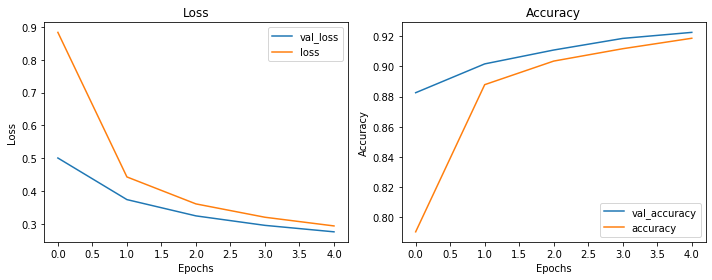

In [19]:
results_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))
visualize_training_results(results_2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


None

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.9959 - accuracy: 0.7361 - val_loss: 0.4578 - val_accuracy: 0.8787
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.3958 - accuracy: 0.8917 - val_loss: 0.3328 - val_accuracy: 0.9086
Epoch 3/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.3218 - accuracy: 0.9098 - val_loss: 0.2912 - val_accuracy: 0.9186
Epoch 4/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2858 - accuracy: 0.9187 - val_loss: 0.2670 - val_accuracy: 0.9262
Epoch 5/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2614 - accuracy: 0.9253 - val_loss: 0.2457 - val_accuracy: 0.9309


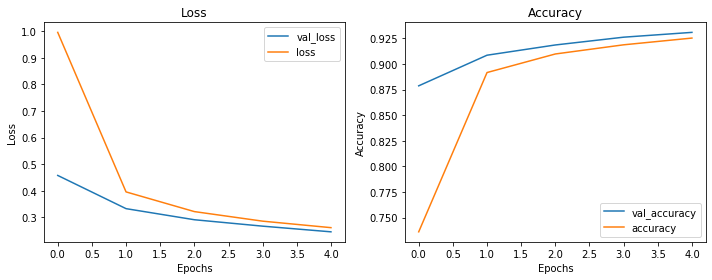

In [20]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(784,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

compile_kws=dict(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_3.compile(**compile_kws)
display(model_3.summary())

fit_kws=dict(epochs=5, batch_size=64, validation_data=(X_test, y_test))
results  = model_3.fit(X_train, y_train,**fit_kws)

visualize_training_results(results)

# END OF 02-11-2020 STUDY GROUP

# HyperParameter Tuning with Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.
1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    

In [21]:
n_units=(64,32,10)
activations=('relu','relu','softmax')


In [29]:
def create_model(n_units=(64,32,10),
                 activations=('relu','relu','softmax'),
                 compile_kws={},fit_kws={}):
    
#     assert len(n_units) == len(activations)
    layers_params = list(zip(n_units,activations))
    
    compile_kws_=dict(loss='categorical_crossentropy', 
                      optimizer='sgd', 
                      metrics=['accuracy'])
    
    
    fit_kws_=dict(epochs=5, batch_size=64, 
                  validation_data=(X_test, y_test))
    
    compile_kws_.update(compile_kws)
    fit_kws_.update(fit_kws)

    model_3 = Sequential()
    for i,layer in enumerate(layers_params):
        print(f"units={layer[0]}")
        print(f"act={layer[1]}")
        units=layer[0]
        act_func = layer[1]
        model_3.add(Dense(units,activation=act_func))
        
        
#     import pdb
#     pdb.set_trace()
#     model_3.add(Dense(n_units activation='relu', input_shape=(784,)))
#     model_3.add(Dense(32, activation='relu'))
#     model_3.add(Dense(10, activation='softmax'))

    
#     display(model_3.summary())
    model_3.compile(**compile_kws_)
    return model_3

model_3 = create_model()

compile_kws_=dict()
model_3.compile(loss='categorical_crossentropy', 
                      optimizer='sgd', 
                      metrics=['accuracy'])
model_3.summary()
# model_3.co

units=64
act=relu
units=32
act=relu
units=10
act=softmax


ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)

params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'compile_kws':{'optimizer':['adam','rmsprop','adadelta']},
                  'activations':[('linear','relu','tanh'),('linear','relu','tanh')],
                  'final_activation':['softmax']}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

ValueError: Parameter values for parameter (compile_kws) need to be a sequence(but not a string) or np.ndarray.

In [ ]:
results  = model_3.fit(X_train, y_train,**fit_kws_)

visualize_training_results(results)

```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```    

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

___


## Section 42: Network Regularlization & Normalization


## Overview - Regularization
- Bias vs variance trade-off
- Using test, train, and vali splits. 
- Prevent overfitting by adding regularization methods (L1, L2, dropout)
- Optimizing and training time reduction by normalizing inputs
    - Normalizing inputs can drasticaly decrease computation time, and prevent vanishing/exploding graidents. 
    
### Hyperparameters to Tune
- Number of hidden units
- Number of layers
- Learning rate ( $\alpha$)
- Activation function

### Training, Validation, and Test Sets
- The fact that there are so many hyperparameters to tune calls for a formalized and unbiased approach to testing/training sets.
- We will use 3 sets when running, selecting, and validating a model:
    - Training set: for training the alogrithm
    - Validation set: to decide which model will be the final one after parameter tuning
    - Testing set: after choosing final  the final model, use the test set for an inbiased estimate of performance. 
- Set sizes:
    - With big data, your dev and test sets don't necessarily need to be 20-30% of all the data. 
    - You can choose test and hold-out sets that are of size 1-5%. 
        - eg. 96% train, 2% hold-out, 2% test set. 
    - It is **VERY IMPORTANT** to make sure holdout and test sample come from the same distribution: eg. same resolution of santa pictures. 
    
### Bias vs Variance 
- A model with high bias may result in underfitting.
    - <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-42-02-tuning-neural-networks-with-regularization-online-ds-ft-021119/master/figures/underfitting.png" width=200>
- A model with high variance may result in overfitting. 
    - <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-42-02-tuning-neural-networks-with-regularization-online-ds-ft-021119/master/figures/overfitting.png" width=200>

- In deep learning, there is less of a bias-variance trad-off vs simpler models. 

**Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |



### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$

    - where $\lambda$ is the regularization parameter. 
    - The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.  

- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 
    
-  Regularization term $||w^{[l]}||^2 _F$  is  A.K.A. The Frobenius Norm
    - $||w^{[l]}||^2 = \sum^{n^{[l-1]}}_{i=1} \sum^{n^{[l]}}_{j=1} (w_{ij}^{[l]})^2$

    
- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

### Dropout Regularization
- Uses a specified probablity to random leave out a node from a ---epoch?


- **USING DROPOUT IN KERAS:**
    - Dropout layers are located in keras.layers.core 
    - Specify probably of being exlcuded/dropped out.
```python
from keras.layers.core import Dropout
model = Sequential()
model.add(layers.Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'))
model.add(layers.core.Dropout(Dropout(0.25))                              
```

### 💡 Data Augmentation (not covered in class)
- Simplest way to reduce overfitting is to increase the size of the training data.
- Difficult to do with large datasets, but can be implemented with images as shown below:
- **For augmenting image data:**
    - Can alter the images already present in the training data by shifting, shearing, scaling, rotating.<br><br> <img src ="https://www.dropbox.com/s/9i1hl3quwo294jr/data_augmentation_example.png?raw=1" width=300>
    - This usually provides a big leap in improving the accuracy of the model. It can be considered as a mandatory trick in order to improve our predictions.

- **In Keras:**
    - `ImageDataGenerator` contains several augmentations available.
    - Example below:
    
```python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal flip=True)
datagen.fit(train)
```
### Early Stopping (not covered in class)
- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period

### Reference Links I found:
- https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/
- http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/



## HOW TO: Custom Scoring Functions

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```

In [ ]:
def get_secret_password(file='/Users/jamesirving/.secret/gmail.json'):
    with open(file) as file:
        import json
        gmail = json.loads(file.read())
    # email_notification()
    print(gmail.keys())
    return gmail

def email_notification(password_obj=None,subject='GridSearch Finished',msg='The GridSearch is now complete.'):
    """Sends email notification from gmail account using previously encrypyted password  object (an instance
    of EncrypytedPassword). 
    Args:
        password_obj (EncryptedPassword object): EncryptedPassword object with username/password.
        subject (str):Text for subject line.
        msg (str): Text for body of email. 

    Returns:
        Prints `Email sent!` if email successful. 
    """
    ## Display instructions if no password_obj 
    if password_obj is None:
        print('Must pass an EncrypytedPassword object.')
        print('>> pwd_obj = EncryptedPassword(username="my_username",password="my_password")')
        print('>> send_email(encrypted_password_obj=pwd_obj)')
        raise Exception('Must pass an EncryptedPassword.')
    if isinstance(password_obj,dict):
        gmail_user = password_obj['username']
        gmail_password = password_obj['password']
    else:
        
        ## Get username and password from password_obj
        gmail_user = password_obj.username
        gmail_password = password_obj._password_
        
    
    # import required packages
    import smtplib
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText
    from email import encoders
    

    ## WRITE EMAIL
    message = MIMEMultipart()
    message['Subject'] =subject
    message['To'] = gmail_user
    message['From'] = gmail_user
    body = msg
    message.attach(MIMEText(body,'plain'))
    text_message = message.as_string()


    # Send email request
    try:
        with  smtplib.SMTP_SSL('smtp.gmail.com',465) as server:
            
            server.login(gmail_user,gmail_password)
            server.sendmail(gmail_user,gmail_user, text_message)
            server.close()
            print('Email sent!')
        
    except Exception as e:
        print(e)
        print('Something went wrong')
        
        

# gmail = get_secret_password()
# email_notification(gmail)

In [ ]:
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix
    [i] Note: To use my_custom_scorer in GridSearch:
    >> from sklearn.metrics import make_scorer
    >> grid = GridSearch(estimator, parameter_grid)
    """
    from sklearn.metrics import make_scorer,confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    # set labels for confusion matrix
    labels = ['Decrease','No Change', 'Increase']

    
    ## If y_true is a multi-column one-hotted target
    if y_true.ndim>1 or y_pred.ndim>1:

        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
            
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
    ## Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    ## Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    score = np.mean(diag)
    
    
    ## Display results for user
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot confusion matrix
    ji.plot_confusion_matrix(cm,normalize=True,classes=labels);

    return score

## Overview - Network Optimization

### Normalization
- Normalizing to a consistent scale (typically 0 to 1) improves performance, but also ensures the process will converge to a stable solution. 

- Methods:
    - Z-Score (subtracting mean, normalize by standard deviation)
    
#### Reference Links
- https://www.coursera.org/lecture/deep-neural-network/normalizing-inputs-lXv6U

### Changing Initial Parameters
- The more input features into layer $l$, the smaller we want each weight $w_i$ to be.
- Rule of thumb:
    - $Var(w_i) = 1/n$ or $2/n$
- A common initilization strategy for the relu activation functions is:

    * $w^{[l]}$ `= np.random.randn(shape)*np.sqrt(2/n_(l-1))`
    
## Optimization:
Alternatives to gradient descent that do not oscillate as much as g.d.:
### Gradient Descent with Momentum:
- Comutes an exponentially weighted average of the gradients to use.
    - will dampen oscillations and improve performance.
- How to:
    -  Calculate current batch's moving averages for the derivatives of $W$ and$b$
        - Compute $V_{dw} = \beta V_{dw} + (1-\beta)dW$
        - $V_{db} = \beta V_{db} + (1-\beta)db$ 
        - So updated terms become
            - $W:= W- \alpha Vdw$
            -$b:= b- \alpha Vdb$
    -  Generally, $\beta=0.9$ is a good hyperparameter value.
    
### RMSprop
- "Root mean square" prop
- Slow down learning in one direction and speed it up in another.
    - In the direction where we want to learn fast, the corresponding S will be small, so dividing by a small number. 
    - In the direction where we will want to learn slow, the corresponding S will be relatively large, and updates will be smaller. 
- How to:
    - On each iteration, use exponentially weighted average again:
        - exponentially weighted average of the squares of the derivatives
        - $S_{dw} = \beta S_{dw} + (1-\beta)dW^2$
        - $S_{db} = \beta S_{dw} + (1-\beta)db^2$
        - So that:
            - $W:= W- \alpha \dfrac{dw}{\sqrt{S_{dw}}}$
            - $b:= b- \alpha \dfrac{db}{\sqrt{S_{db}}}$
    - Often, add small $\epsilon$ in the denominator to make sure that you don't end up dividing by 0.


### Adam Optimization Algorithm
- Adaptive Moment Estimation - essentially combines both methods above.
- Works very well in most situations.
- How to: 
    - Initialize: $V_{dw}=0, S_{dw}=0, V_{db}=0, S_{db}=0$.
    - For each teration: compute $dW, db$ using the current mini-batch.
        -  $V_{dw} = \beta_1 V_{dw} + (1-\beta_1)dW$, $V_{db} = \beta_1 V_{db} + (1-\beta_1)db$ 
        -  $S_{dw} = \beta_2 S_{dw} + (1-\beta_2)dW^2$, $S_{db} = \beta_2 S_{db} + (1-\beta_2)db^2$ 
        
- As with  momentum and then RMSprop. We need to perform a correction! This is sometimes also done in RSMprop, but definitely here too.
    - $V^{corr}_{dw}= \dfrac{V_{dw}}{1-\beta_1^t}$, $V^{corr}_{db}= \dfrac{V_{db}}{1-\beta_1^t}$

    - $S^{corr}_{dw}= \dfrac{S_{dw}}{1-\beta_2^t}$, $S^{corr}_{db}= \dfrac{S_{db}}{1-\beta_2^t}$

    - $W:= W- \alpha \dfrac{V^{corr}_{dw}}{\sqrt{S^{corr}_{dw}+\epsilon}}$ and

    - $b:= b- \alpha \dfrac{V^{corr}_{db}}{\sqrt{S^{corr}_{db}+\epsilon}}$ 


### Learning Rate Decay
- Learning rate decreases across epochs.
    - $\alpha = \dfrac{1}{1+\text{decay_rate * epoch_nb}}* \alpha_0$

- other methods:
    - $\alpha = 0.97 ^{\text{epoch_nb}}* \alpha_0$ (or exponential decay)<br>OR:
    - $\alpha = \dfrac{k}{\sqrt{\text{epoch_nb}}}* \alpha_0$<br> OR:
    - Manual decay.
    
    
    
### HYPERPARAMETER TUNING:
Most important:
- $\alpha$

Important next:
- $\beta$ (momentum)
- Number of hidden units
- mini-batch-size

Finally:
- Number of layers
- Learning rate decay

Almost never tuned:
- $\beta_1$, $\beta_2$, $\epsilon$ (Adam)

- Tip: Don't use a grid, because hard to say in advance which hyperparameters will be important.


### OPTIMIZAITON REFS:
- https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
- https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network https://www.springboard.com/blog/free-public-data-sets-data-science-project/